<a href="https://colab.research.google.com/github/rajveer870/winetest/blob/main/Wine_Prediction_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sb
import matplotlib.pyplot  as plt


In [ ]:
df=pd.read_csv('/content/winequality_red.csv')
print(df.head())
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

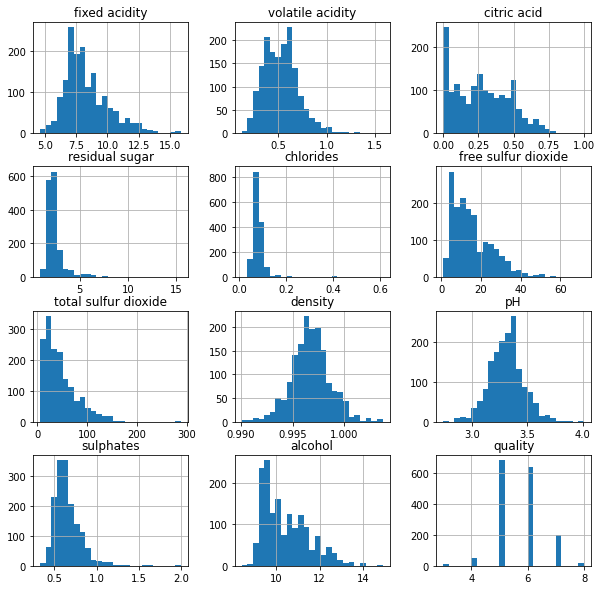

In [ ]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

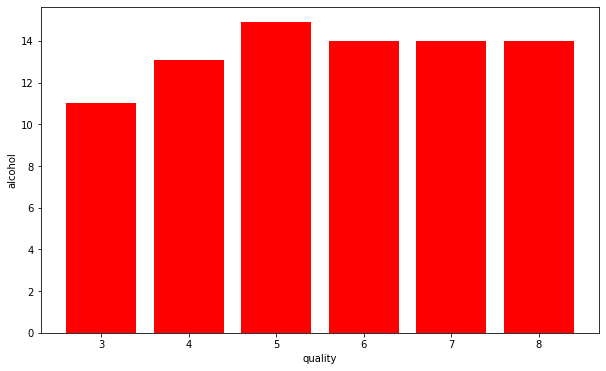

In [7]:
plt.figure(figsize=[10,6])
plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

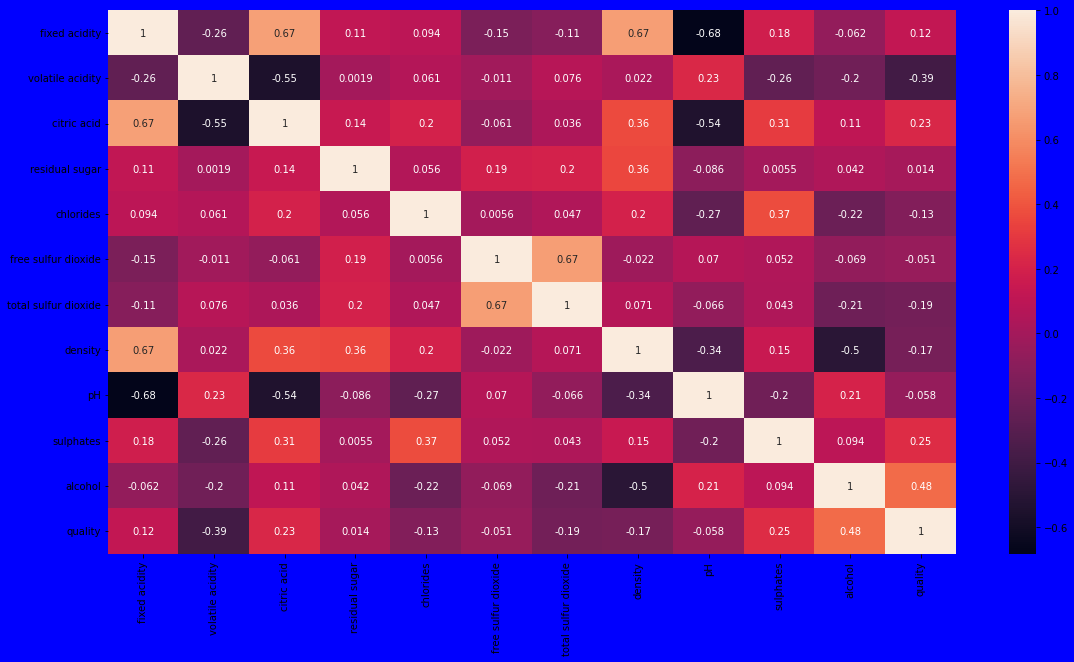

In [8]:
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(df.corr(),annot=True)

In [9]:
from pandas.compat.numpy import np_array_datetime64_compat
for a in range(len(df.corr().columns)):
   for b in range(a):
      if abs(df.corr().iloc[a,b]) >0.7:
            name=df.corr().columns[a]
            print(name)

In [10]:
new_df=df.drop('total sulfur dioxide',axis=1)

In [11]:
new_df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [12]:
new_df.update(new_df.fillna(new_df.mean()))

In [14]:
next_df=pd.get_dummies(new_df,drop_first=True)
next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [19]:
next_df['best quality']=[1 if x>=7 else 0 for x in df.quality]
print(next_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [24]:
from sklearn.model_selection import train_test_split
# independent variables
x = next_df.drop(['quality','best quality'],axis=1)
# dependent variable
y = next_df['best quality']
 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)


In [25]:
#importing  module
from sklearn.preprocessing import MinMaxScaler
#creating normalization object
norm = MinMaxScaler()
#fit data
norm_fit = norm.fit(x_train)
new_xtrain=norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
print(new_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


In [37]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import mean_squared_error
 from sklearn.metrics import classification_report
 rnd=RandomForestClassifier()
 fit_rnd = rnd.fit(new_xtrain,y_train)
 
# checking the accuracy score

rnd_score = rnd.score(new_xtest,y_test)
y_predict = rnd.predict(new_xtest)
print(y_predict)
print('score of model is : ',rnd_score)
 
print('.................................')
 
print('calculating the error')
 
# checking mean_squared error
MSE = mean_squared_error(y_test,y_predict)
 
# checking root mean squared error
RMSE = np.sqrt(MSE)
 
print('mean squared error is : ',MSE)
 
print('root mean squared error is : ',RMSE)
print(classification_report(y_test,y_predict))



[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
score of model is :  0.9
.................................
calculating the error
mean squared error is :  0.1
root mean squared error is :  0.31622776601683794
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       272
           1       0.81      0.44      0.57        48

    accuracy              

In [43]:

x_predict = list(rnd.predict(new_xtest))
df = {'predicted':x_predict,'original':y_test}
pd.DataFrame(df).head(30)

,predicted,original
1035,0,1
49,0,0
799,0,0
538,0,1
660,0,0
990,0,0
398,0,0
1068,0,1
1155,0,0
468,0,0
